<div style="background-color: #d4f7d4; padding: 30px; border-radius: 10px;">

<h1 style="text-align: center;">AI GardenWise</h1>

<p style="text-align: center;">An Intelligent Urban Gardening Guide Using Fine-Tuned Gemma Model<>
div>

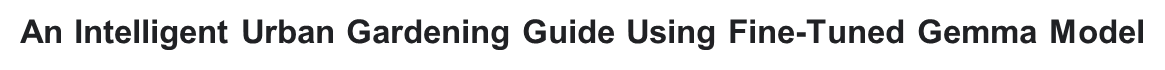
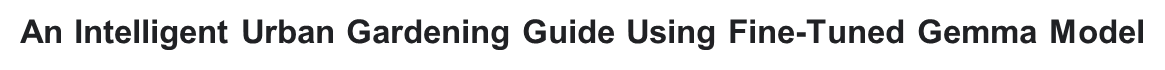
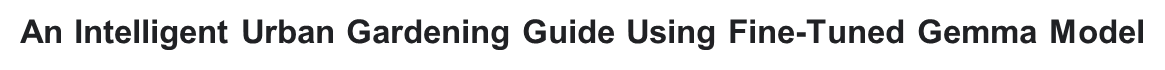
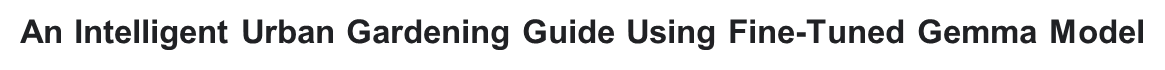

### The Growing Challenge of Food Insecurity Amid Global Population Growth
**Food insecurity** remains one of the most challenging global pressures, amplified by socio-economic and environmental factors. The global population, projected to reach ena l**10 billion by 2005*0, will further increase the demand for food, challenging current agricultural practices and food systems .*Source: The United Nations,2017*>


According to the report "*The State of Food Security and Nutrition in the World 2024 (FAO, IFAD, UNICEF, WFP, and WHO)*", **Africa** remains the region with the largest estimated proportion of the population facing hunger – **20.4 percent**, compared with **8.1 percent** in **Asia**, **6.2 percent** in **Latin America and the Caribbean**, and **7.3 percent** in **Oceania**. However, Asia is still home to more than half of all those facing hunger in the world, about 385 million people. 

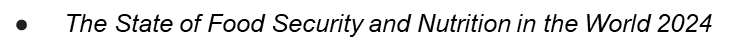
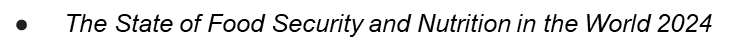
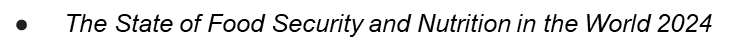
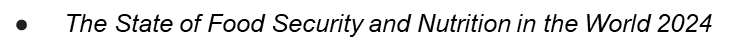
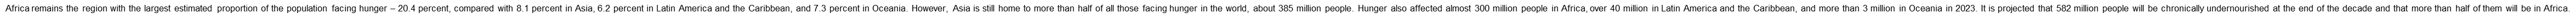
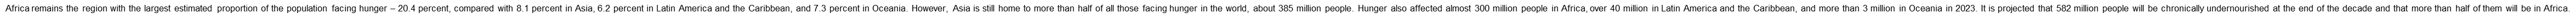
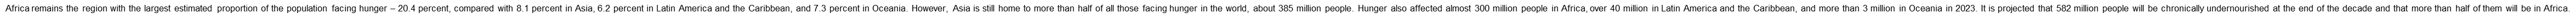
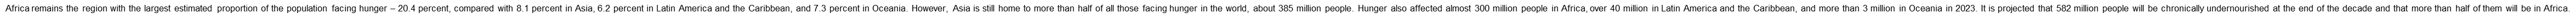

Hunger also affected almost **300 million** people in **Africa**, over **40 million** in **Latin America and the Caribbean**, and more than **3 million** in **Oceania** in **2023**. It is projected that **582 million people will be chronically undernourished** at the end of the decade and that more than half of them will be in Africa.

### Project Background – UN Sustainable Development Goals
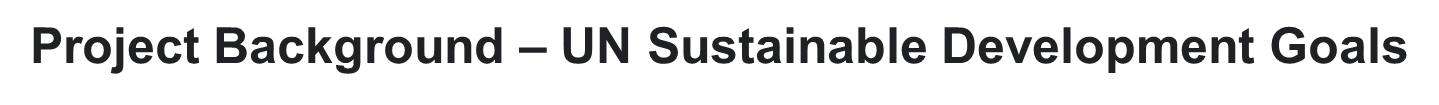
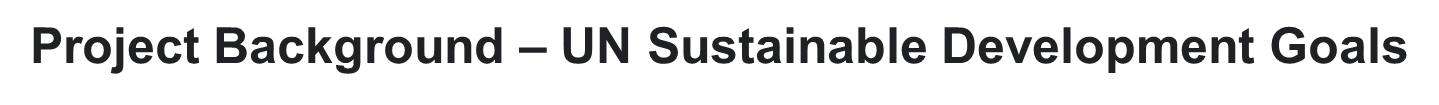
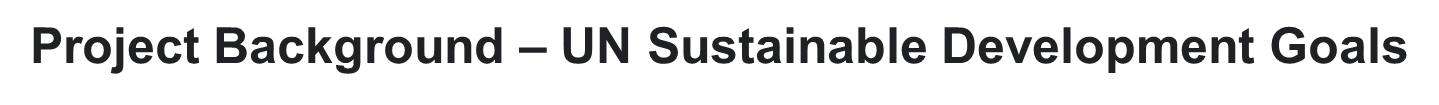
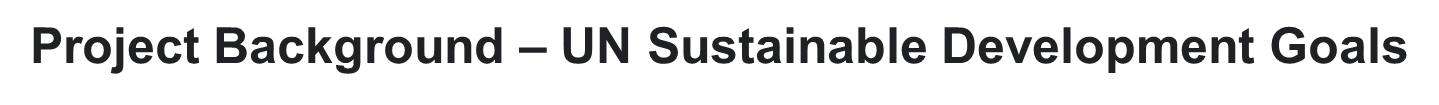

In 2015, the United Nations called for urgent global action by introducing the 17 Sustainable Development Goals (SDGs) to address pressing worldwide challenges. Four of these goals closely connect our project to the critical issues of food insecurity, with SDG 2 — **End hunger, achieve food security and improved nutrition, and promote sustainable agriculture** — as the most relevant. Our project aligns with this goal by addressing both **food insecurity** and **food sovereignty**, empowering communities to sustainably grow and control their own food resources.

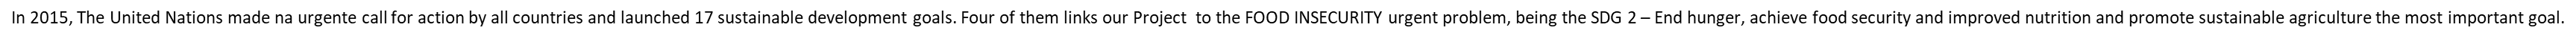
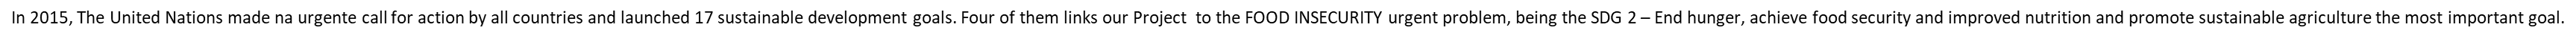
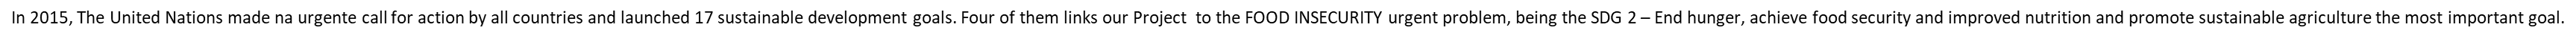
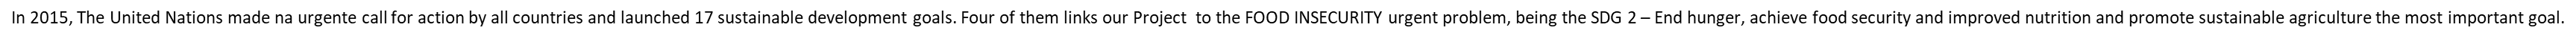

In **2023**, an estimated **28.9 percent of the global population** – **2.33 billion people** – were moderately or severely **food insecure**, meaning they did not have regular access to adequate food.

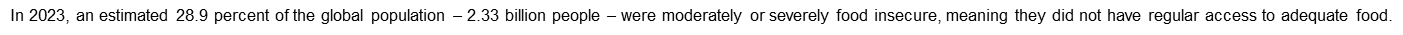
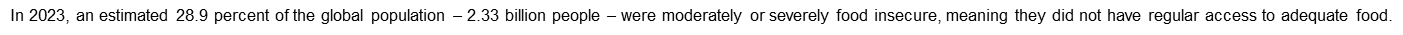
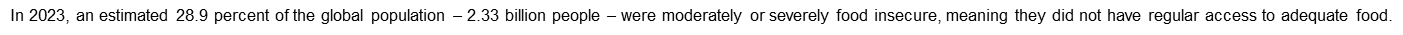
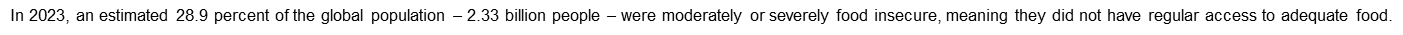

### Enhancing Food Producing Autonomy
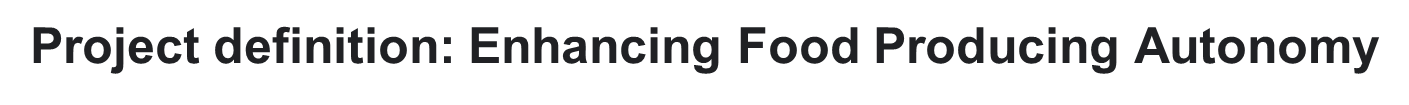
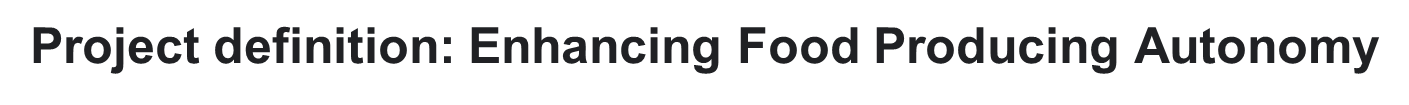
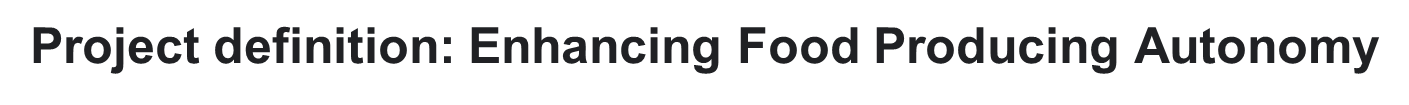
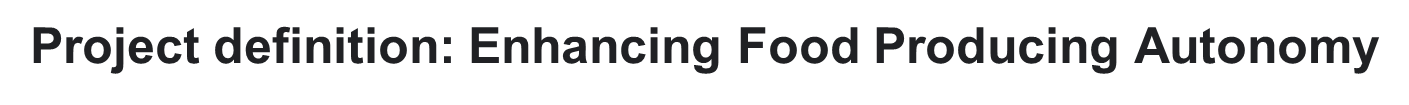

The **AI GardenWise** intend to enhance food production autonomy among people facing food insecurity. Home and Community gardens are growing in Brazil and Latin America and  our Project intend to give an easy  and accessible tool to provide information and guidance on best gardening practices, nutrition facts and health protective factors.
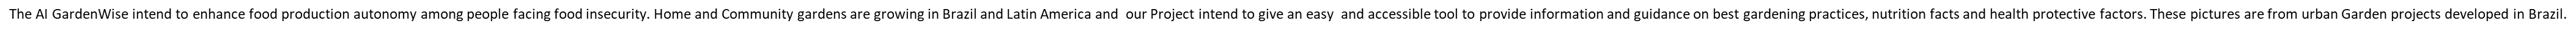
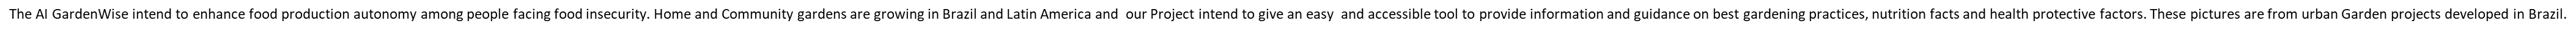
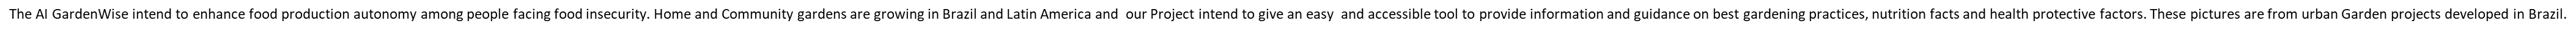
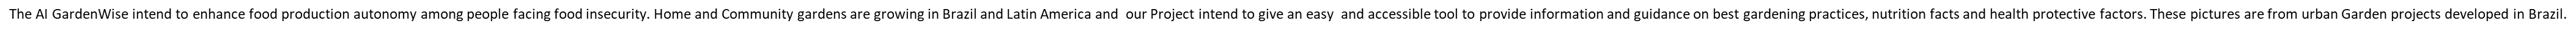

**AI Garden Wise** is the first step to the development of a full operational chatbot, and was developed as part of a fellowship program hosted by **KaggleX**. AI GardenWise is being designed to support individuals interested in urban gardening by providing expert guidance. The main objective of the project is to make growing food accessible and manageable for those with limited gardening experience or restricted growing areas to promote food sovereignty. 

AI Garden Wise offers advice on:
- Soil preparation
- Suitable plant species for confined spaces
- Effective watering techniques
- Pest management
- Comprehensive nutrition information

Additionally, the chatbot highlights the health benefits associated with various vegetables, herbs, and fruits, encouraging users to make informed choices about their diets.

The heart of AI Garden Wise is a custom fine-tuned model based on the **Gemma** architecture, specifically trained to interpret user queries and generate relevant responses. The chatbot's knowledge base is built from an extensive, specialized dataset compiled from credible agricultural and nutritional sources, making it both reliable and practical for users of all levels.


### Fine-tuning Gemma-2b-en

In [5]:
# Install packages

!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install --upgrade keras-nlp
!pip install --upgrade tensorflow-text

# Import packages

import os
import pandas as pd
import numpy as np
import json
import tensorflow_text as text
import tensorflow as tf

# Import Keras and Keras NLP from TensorFlow

from tensorflow import keras
import keras_nlp # This should work now after updating the libraries and restarting the runtime


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# Data Input

data_path = "/kaggle/input/gardening-q-and-a/dataset_plants_v5.jsonl" # v5 with 939 examples

In [7]:
# Use TensorFlow as Backend

os.environ["KERAS_BACKEND"] = "tensorflow"

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras_nlp.models import GemmaCausalLM

In [9]:
# Load the Dataset

data = pd.read_json(data_path, lines=True)

In [10]:
# Preprocess the dataset

data_list = []
with open(data_path) as file:
    for line in file:
        features = json.loads(line)

        # Formatar o exemplo como uma única string
        template = "Instruction:\n{instruction}\n\nResponse:\n{response}"
        data_list.append(template.format(**features))

In [12]:
# Instantiate the model wih the preset Gemma 2b

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma2_2b_en")
gemma_lm.summary()

2024-11-14 00:28:27.003159: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,614,341,888 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,614,341,888 (9.74 GB)

 Trainable params: 2,614,341,888 (9.74 GB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Fine-tuning with LoRA rank 4

gemma_lm.backbone.enable_lora(rank=4)
gemma_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2304)        │   2,617,270,528 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     589,824,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,617,270,528 (9.75 GB)

 Trainable params: 2,928,640 (11.17 MB)

 Non-trainable params: 2,614,341,888 (9.74 GB)

In [14]:
# Limit the length of the input sequence

gemma_lm.preprocessor.sequence_length = 256


# Define the AdamW optimizer

optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01,
)

# Exclude LayerNorm and bias terms from weight decay

optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

# Compile the modelo before training

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


In [15]:
# Fine-tune the model

gemma_lm.fit(data_list, epochs=1, batch_size=1)

939/939 ━━━━━━━━━━━━━━━━━━━━ 3950s 4s/step - loss: 0.4626 - sparse_categorical_accuracy: 0.5610


### Inference after Fine-tuning

In [16]:
# Inference after fine-tuning

# Prompt example

prompt = template.format(
    instruction="What are the ideal light conditions for growing peppers?",
    response="",
)


print(gemma_lm.generate(prompt, max_length=256))

I0000 00:00:1731548598.360944     338 service.cc:148] XLA service 0x79b240922000 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731548598.361388     338 service.cc:156]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1731548598.371618     338 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Instruction:
What are the ideal light conditions for growing peppers?

Response:
Peppers thrive in full sun, with at least six hours of direct sunlight daily. They also require well-drained soil and regular watering.


In [18]:
# Inference after fine-tuning

# Prompt Example
prompt = template.format(
    instruction="What are the benefits of using mulch in the garden?",
    response="",
)

print(gemma_lm.generate(prompt, max_length=256))

Instruction:
What are the benefits of using mulch in the garden?

Response:
Mulch is a layer of organic material, such as straw, wood chips, or bark, placed on top of the soil to suppress weeds, retain moisture, and regulate soil temperature. It also helps to improve soil structure, reduce erosion, and provide nutrients to the soil over time. Mulch is particularly beneficial in vegetable gardens, where it helps to maintain soil moisture and suppress weeds, allowing for more efficient watering and weed control.


In [19]:
# Define the path to save the weights 

#save_path = 'gemma_garden_wise_weights_ds939.weights.h5'
# Save weights
gemma_lm.save_weights('gemma_garden_wise_weights_ds939.weights.h5')

## Model Evaluation

In [20]:
# Test data

test_data_path = "/kaggle/input/ai-gardenwise-test-dataset/GardenWise_test_dataset_6.jsonl"

In [21]:
# Function to read the jsonl file

def read_jsonl(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            yield json.loads(line)

In [22]:
!pip install nltk
!pip install rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.9 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24936 sha256=6224917cf8a8e06c544ac416d35e000cc5a3e9df1dbe0276f10d86b66a8e4349
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import nltk
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import json

nltk.download('punkt')
nltk.download('wordnet', quiet=True)

# Define scoring objects and smoothing function
smoothing_function = SmoothingFunction().method1
rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Initialize cumulative scores and counters
total_bleu, total_rouge1, total_rougeL, total_meteor_score, count = 0, 0, 0, 0, 0

# Load test data (assuming 'read_jsonl' is a defined function for loading)
test_data = read_jsonl(test_data_path)

# Iterate over the test data, generate responses, and calculate all scores
for entry in test_data:
    prompt = f"Instruction: {entry['instruction']}\n\nResponse:"
    expected_response = entry['response']  # Assumed to exist in your test data structure

    # Generate a response using the model
    generated_response = gemma_lm.generate(prompt, max_length=256)

    # Calculate BLEU score with smoothing
    bleu_score = sentence_bleu([expected_response.split()], generated_response.split(), smoothing_function=smoothing_function)
    total_bleu += bleu_score

    # Calculate ROUGE scores
    rouge_scores = rouge.score(expected_response, generated_response)
    total_rouge1 += rouge_scores['rouge1'].fmeasure
    total_rougeL += rouge_scores['rougeL'].fmeasure

    # Calculate METEOR score
    meteor = meteor_score([expected_response.split()], generated_response.split())
    total_meteor_score += meteor

    # Increment counter
    count += 1

# Calculate average scores
average_bleu = total_bleu / count if count > 0 else 0
average_rouge1 = total_rouge1 / count if count > 0 else 0
average_rougeL = total_rougeL / count if count > 0 else 0
average_meteor_score = total_meteor_score / count if count > 0 else 0

# Print evaluation results
print(f"Average BLEU Score: {average_bleu}")
print(f"Average ROUGE-1 F1 Score: {average_rouge1}")
print(f"Average ROUGE-L F1 Score: {average_rougeL}")
print(f"Average METEOR Score for Role Test Dataset: {average_meteor_score}")


### Analysis

Our model still falls short of our desired performance. We are facing several challenges: our dataset is limited, with only 939 examples; our computing capacity is constrained, allowing us to fine-tune the model for just one epoch; we had to restrict our prompt length to 256 characters, and our LoRA rank is set at 4, which also limits fine-tuning results. Additionally, we should consider adopting alternative evaluation methods.

Despite the poor model evaluation, the responses contain accurate information. This leads me to believe that I should consider improving the evaluation methods to better capture these nuances.

### **Sources**

- [Maximizing the Potential of Large Language Models](https://gradientflow.com/maximizing-the-potential-of-large-language-models/)
- Gemma: Open Models Based on Gemini Research and Technology, Gemma Team, Google DeepMind
- *The World Population Prospects: The 2017 Revision*, published by the UN Department of Economic and Social Affairs
- FAO, IFAD, UNICEF, WFP, and WHO. 2024. *The State of Food Security and Nutrition in the World 2024 – Financing to end hunger, food insecurity and malnutrition in all its forms.* Rome. [https://doi.org/10.4060/cd1254en](https://doi.org/10.4060/cd1254en)
4en

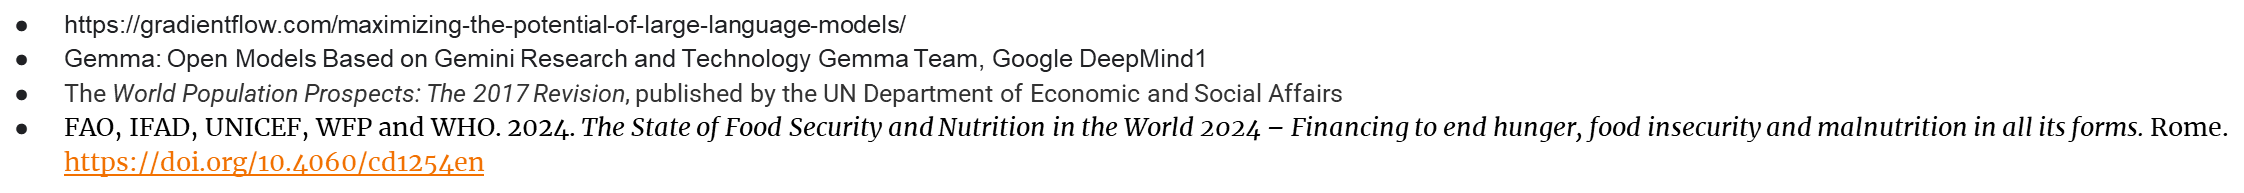
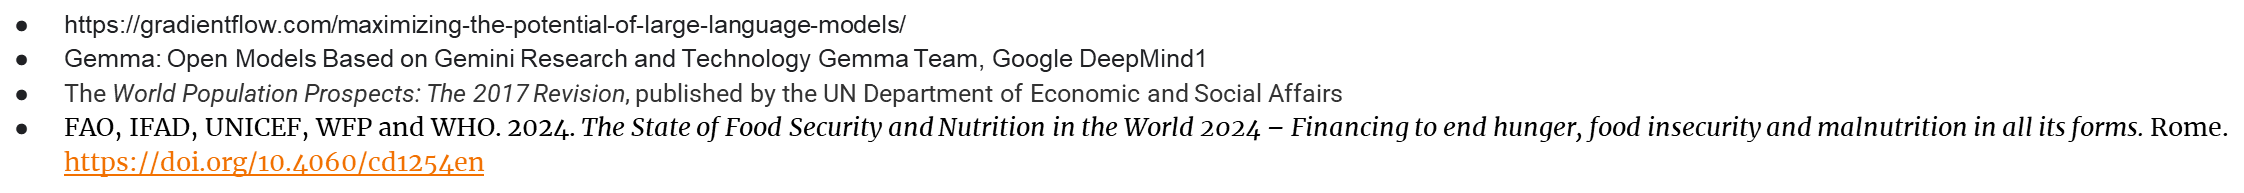
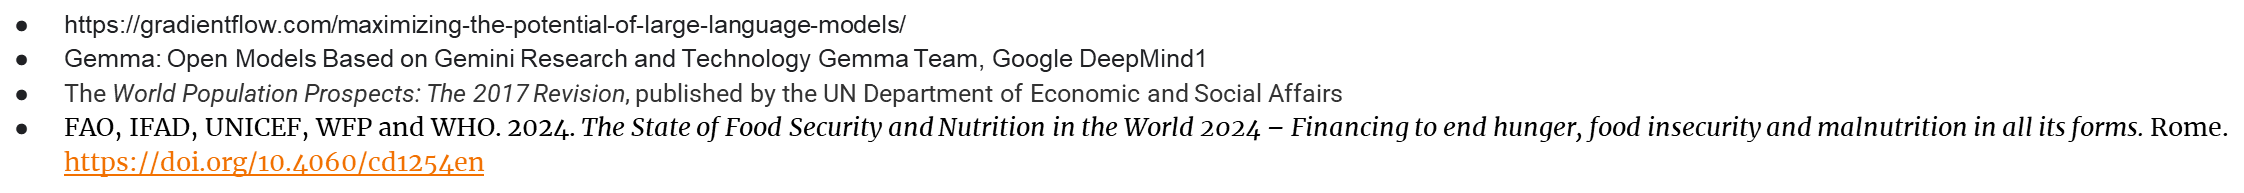
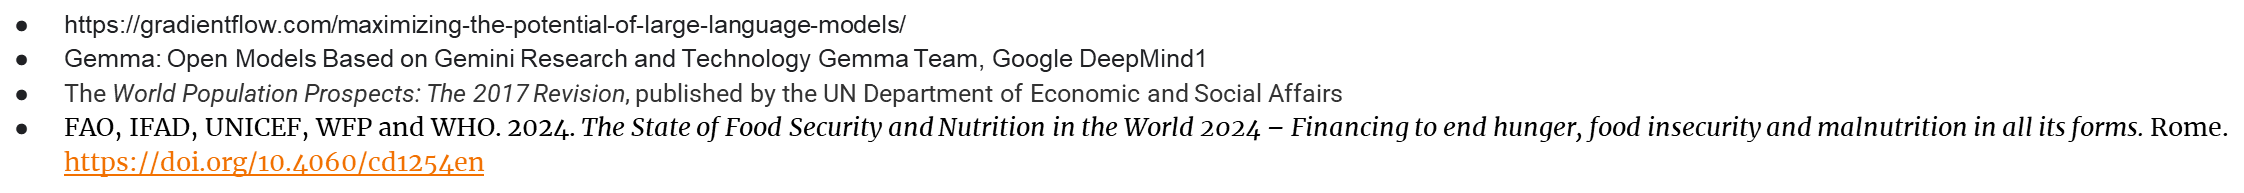